# Analyzing Mars 2020 MEDA Data

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import *

In [38]:
# Read in data file
filename = "./WE__0089___________DER_PS__________________P01.CSV"
data = pd.read_csv(filename)
print(data)

            SCLK                LMST           LTST  PRESSURE  \
0      674795165  00089M00:01:02.835  0088 23:54:24    759.18   
1      674795166  00089M00:01:03.808  0088 23:54:25    759.09   
2      674795167  00089M00:01:04.781  0088 23:54:26    759.10   
3      674795168  00089M00:01:05.755  0088 23:54:27    759.16   
4      674795169  00089M00:01:06.728  0088 23:54:28    759.20   
...          ...                 ...            ...       ...   
38541  674861997  00089M18:05:07.210  0089 17:58:43    756.12   
38542  674861998  00089M18:05:08.184  0089 17:58:44    756.08   
38543  674861999  00089M18:05:09.157  0089 17:58:45    756.10   
38544  674862000  00089M18:05:10.130  0089 17:58:46    756.08   
38545  674862001  00089M18:05:11.103  0089 17:58:47    756.12   

       PRESSURE_UNCERTAINTY  TRANSDUCER  
0                       NaN           1  
1                       NaN           1  
2                       NaN           1  
3                       NaN           1  
4        

17.97972222222222


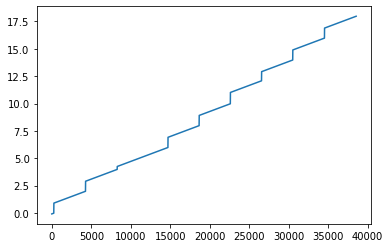

In [118]:
def which_sol(filename):
    """
    Based on the filename, returns the sol corresponding to a data file
    
    Args:
        filename (str): name of the file
        
    Returns:
        sol (int) associated with that file
    """
    
    return int(filename[6:10])

def make_seconds_since_midnight(filename):
    """
    The MEDA data provide times in the LTST field in the format "sol hour:minute:second". This 
    
    Args:
        filename (str): name of the file
        
    Returns:
        number of seconds in each row since midnight of the primary sol for that file
    
    """
    
    primary_sol = which_sol(filename)
    data = pd.read_csv(filename)

    # Grab the sols and times associated with each row
    sols_str = data['LTST'].str.split(expand=True)[0].values
    times_str = data['LTST'].str.split(expand=True)[1].values
    
    # Turn the times strings into seconds since midnight of the primary sol
    delta_sols = sols_str.astype(float) - float(primary_sol)
    
    # And then in a very cludgey way, convert times to seconds since primary sol's midnight
    time = np.array([float(time_str[i].split(":")[0]) + delta_sols[i]*24. +\
      float(time_str[i].split(":")[1])/60 +\
     float(time_str[i].split(":")[2])/3600. for i in range(len(time_str))])
    
    return time

time = make_seconds_since_midnight(filename)